# Importacion de librerias

In [ ]:
# librerias a usarse
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
regresion_lineal = LinearRegression()


# Carga de datos

In [ ]:
# Importar archivo desde drive
url='https://drive.google.com/file/d/1h1z5Gj3o24dG3_q16QNRfuuAl5hlBVuf/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
datadrive = pd.read_csv(dwn_url, sep =",")

# Exploracion de datos

In [ ]:
# se extraen las primeras 5 filas para ver los datos
datadrive.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


nombre de las columnas :
* age - Edad del asegurado
* sex - Género
* bmi - Indice de masa corporal 
* children - Número de hijos
* smoker - Indicador si fuma
* region - Región donde vive el asegurado
* charges -  Prima del seguro

In [ ]:
# Nombre de las columnas
datadrive.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Numero de filas y columnas
datadrive.shape

(1338, 7)

In [ ]:
# Tipo de datos de cada columna
datadrive.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# limpieza y duplicados

In [ ]:
# Se ve la informacion de las columnas, con el proposito de saber que contiene cada una asi como si tiene valores unicos o repetidos (categorias)
for col in datadrive.columns:
    print("-"*20 + col+"-"*20)
    display(datadrive[col].value_counts())

--------------------age--------------------


18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

--------------------sex--------------------


male      676
female    662
Name: sex, dtype: int64

--------------------bmi--------------------


32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

--------------------children--------------------


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

--------------------smoker--------------------


no     1064
yes     274
Name: smoker, dtype: int64

--------------------region--------------------


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

--------------------charges--------------------


1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

In [ ]:
# Se buscan nulos
datadrive.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Se buscan duplicados
datadrive[datadrive.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Aparece un duplicado, el cual se eliminara para un mejor entrenamiento 

In [ ]:
datadrive.drop_duplicates(inplace=True)

In [ ]:
datadrive[(datadrive.age==19) & (datadrive.charges==1639.5631)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
"""La funcion nunquite nos permite saber cuantos valores diferentes hay en cada columna, es similar a lo que se hizo al inicio, 
   con la diferencias de que aqi solo extraemos el numero de valores unicos y no cuales son"""
datadrive.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
datadrive.charges.value_counts()

8825.08600     1
4399.73100     1
5257.50795     1
1980.07000     1
4340.44090     1
              ..
4536.25900     1
12269.68865    1
6360.99360     1
7371.77200     1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

La prima del seguro al tener tantos casi en su totalidad todos los valores unicos no hay mucho que se pueda hacer con ella, seria agrupar los valores en rangos o bien eliminarla, dpendiendo de cual sea nuestro objetivo.

Algo similar llega a pasar con el indicer de masa corporar, aunque los calores unicos sean menores siguen siendo demasiados para graficarlos como posteriormete se hara 

# Graficacion

In [ ]:
data = go.Box(y = datadrive["age"])
layout = go.Layout(title = "Edades de personas")
fig = go.Figure(data = data, layout = layout)
fig.show()

Se pued eobservar un boxplor con las edades de las personas del dataframe, estando estas mas concentardas entre los 27 y 51 años, teniendo la media como 39 

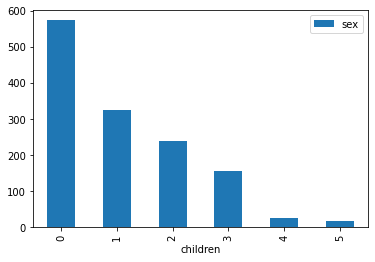

In [ ]:
datadrive[["sex","children"]].groupby("children").count().plot(kind="bar")

En la grafica anteriro se puede obervar la cantidad de niños que las personas tienen en el dataset, a malo grsos esta informacion es correcta solo se tendria que ajustar la etiqueta o hacerlo de una mejor manera como en el siguiente donde se puede ver de una mejor manera la informacion

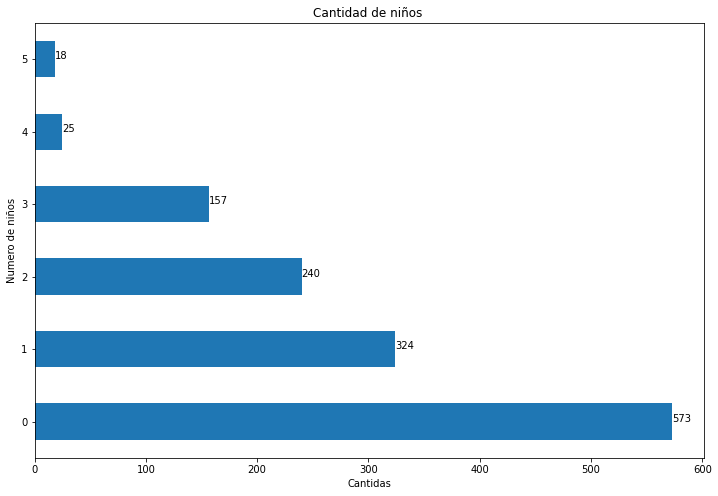

In [ ]:
datadrive.children.value_counts().plot(kind="barh",figsize=(12,8))
for index, value in enumerate(datadrive.children.value_counts()):
    plt.text(value, index, str(value))
plt.title("Cantidad de niños ")
plt.ylabel("Numero de niños")
plt.xlabel('Cantidas')
plt.show()

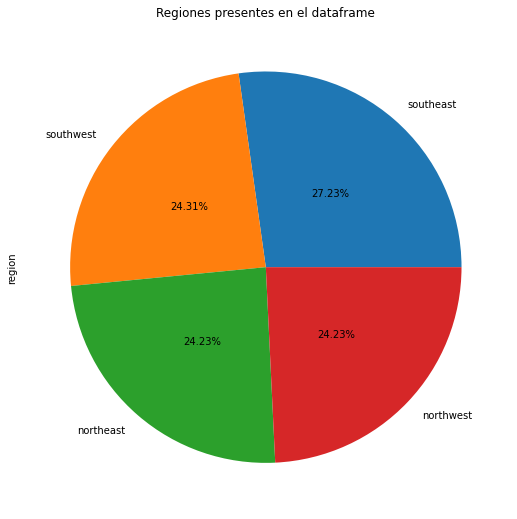

In [ ]:
datadrive["region"].value_counts().plot(kind="pie", subplots=True, figsize=(9,9),autopct='%.2f%%', legend=False,pctdistance=.5)
plt.title("Regiones presentes en el dataframe")
# plt.legend(loc="upper left")
plt.show()

En el anteriro grafico se puede observar que casi la distribucion entre las 4 regiones es igual, difieren por poco a excepcion de southeast

Se intenta de buscar una correracion entre las variables numericas o una relacion mediante las garficas

In [ ]:
datadrive[["bmi","age"]].corr()

,bmi,age
bmi,1.000000,0.109344
age,0.109344,1.000000


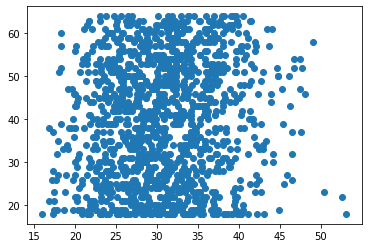

In [ ]:
x = datadrive.bmi
y = datadrive.age
plt.scatter(x, y)
plt.show()

Text(0.5, 1.0, 'Scatter plot bmi vs age')

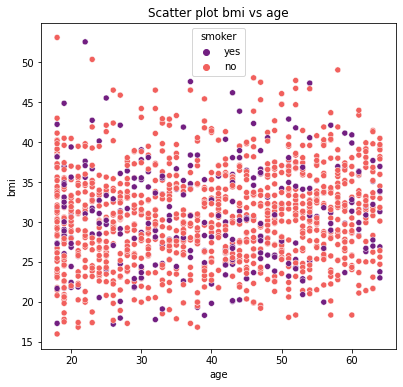

In [ ]:
f= plt.figure(figsize=(14,6)) 
ax = f.add_subplot(121)

sns.scatterplot(x = "age",y = "bmi", data = datadrive ,palette="magma", hue="smoker", ax=ax) 
ax.set_title('Scatter plot bmi vs age')

In [ ]:
datadrive[["charges","age"]].corr()

,charges,age
charges,1.000000,0.298308
age,0.298308,1.000000


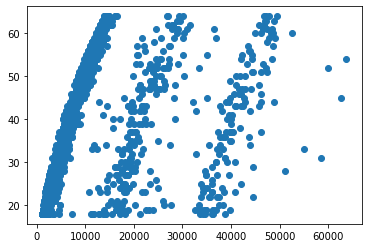

In [ ]:
x = datadrive.charges
y = datadrive.age
plt.scatter(x, y)
plt.show()

Text(0.5, 1.0, 'Scatter plot Charges vs age')

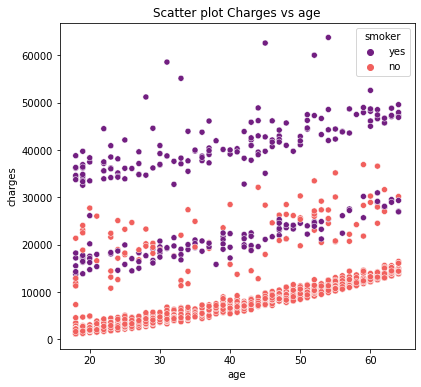

In [ ]:
f= plt.figure(figsize=(14,6)) 
ax = f.add_subplot(121)

sns.scatterplot(x = "age",y = "charges", data = datadrive ,palette="magma", hue="smoker", ax=ax) 
ax.set_title('Scatter plot Charges vs age')

In [ ]:
datadrive[["bmi","charges"]].corr()

,bmi,charges
bmi,1.000000,0.198401
charges,0.198401,1.000000


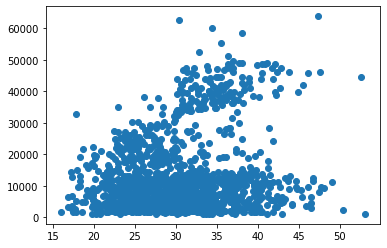

In [ ]:
x = datadrive.bmi
y = datadrive.charges
plt.scatter(x, y)
plt.show()

Text(0.5, 1.0, 'Scatter plot bmi vs charges')

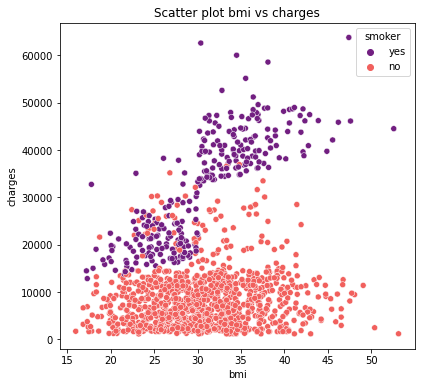

In [ ]:
f= plt.figure(figsize=(14,6)) 
ax = f.add_subplot(121)

sns.scatterplot(x = "bmi",y = "charges", data = datadrive ,palette="magma", hue="smoker", ax=ax) 
ax.set_title('Scatter plot bmi vs charges')


In [ ]:
datadrive[["children","age"]].corr()

,children,age
children,1.000000,0.041536
age,0.041536,1.000000


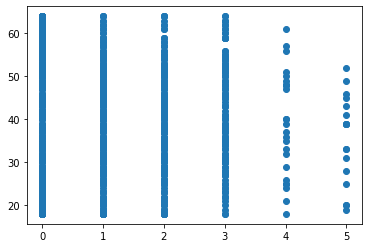

In [ ]:
x = datadrive.children
y = datadrive.age
plt.scatter(x, y)
plt.show()

Text(0.5, 1.0, 'Scatter plot children vs age')

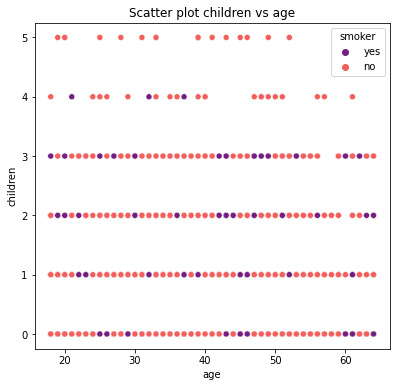

In [ ]:
f= plt.figure(figsize=(14,6)) 
ax = f.add_subplot(121)

sns.scatterplot(x = "age",y = "children", data = datadrive ,palette="magma", hue="smoker", ax=ax) 
ax.set_title('Scatter plot children vs age')

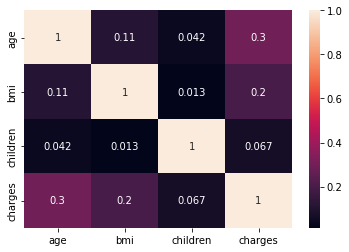

In [ ]:
correlacion = datadrive.corr()
sns.heatmap(correlacion, annot=True)

# 3. Entrenamiento lineal multiple


## Hipotesis 1 
Utilizando solo las variables numericas Dado que lso modelos solo aceptan variables numericas, vamos a eliminar todas aquellas varuables que no lo son

In [ ]:
for col in datadrive.columns:
  print(col +" "+ str(datadrive[col].dtype))

age int64
sex object
bmi float64
children int64
smoker object
region object
charges float64


In [ ]:
numeric_columns = datadrive[["age","bmi","charges"]]

In [ ]:
x_hipot1 = numeric_columns.drop("charges",axis = 1) #Variables independientes
y_hipot1 = numeric_columns["charges"] # Variable dependiente

In [ ]:
# Preparamos tarin data y test data
x_hipot1_train, x_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(x_hipot1, y_hipot1, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot1_train,y_hipot1_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot1_train =  mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train: "+ str(mse_hipot1_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot1_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test: "+ str(mse_hipot1_test))

Error cuadratico medio (MSE) Train: 129511343.61223857
Error cuadratico medio (MSE) test: 129309414.5045359


## Hipotesis 2: 
Transformar las variables categoricas en variables numericas

In [ ]:
for col in datadrive.columns:
  print(col +" "+ str(datadrive[col].dtype))

age int64
sex object
bmi float64
children int64
smoker object
region object
charges float64


In [ ]:
datadrive

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
categorical_columns = ["sex","children","smoker","region"]

In [ ]:
# Preparamos el dataset de la hipotenusa 2
categorical_columns_hipot2 = pd.get_dummies(data = datadrive, prefix = "OHE", prefix_sep = "_", columns = categorical_columns, drop_first=True, dtype = "int8")

In [ ]:
categorical_columns_hipot2

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_hipot2 = categorical_columns_hipot2.drop("charges",axis = 1) #Variables independientes
y_hipot2 = categorical_columns_hipot2["charges"] # Variable dependiente

In [ ]:
# Preparamos tarin data y test data
x_hipot2_train, x_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(x_hipot2, y_hipot2, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot2_train,y_hipot2_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot2_train)


# Calculamos el error cuadratico medio (MSE)
mse_hipot2_train =  mean_squared_error(y_true = y_hipot2_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))


# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot2_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot2_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))

Error cuadratico medio (MSE) Train 1: 129511343.61223857
Error cuadratico medio (MSE) Train 2: 36036622.56880779
Error cuadratico medio (MSE) test 1: 129309414.5045359
Error cuadratico medio (MSE) test 2: 38148226.45768796


## Hipotesis 3

In [ ]:
#Se prepara el dataset de la hipotesis 3
data_hipt3 = pd.get_dummies(data = datadrive, prefix = "OHE", prefix_sep = "_", columns = categorical_columns, drop_first=True, dtype = "int8")

In [ ]:
x_hipot3 = categorical_columns_hipot2.drop("charges",axis = 1) #Variables independientes
y_hipot3 = categorical_columns_hipot2["charges"] # Variable dependiente

In [ ]:
# se escala la variable charges para hacerla mas estandar
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series, 
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot3 = scaler.fit_transform(y_hipot3.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot3 = y_hipot3.reshape(1,-1)[0]

In [ ]:
x_hipot3_train, x_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(x_hipot3, y_hipot3, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot3_train,y_hipot3_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot3_train)


# Calculamos el error cuadratico medio (MSE)
mse_hipot3_train =  mean_squared_error(y_true = y_hipot3_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))
print("Error cuadratico medio (MSE) Train 3: "+ str(mse_hipot3_train))



# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot3_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot3_test = mean_squared_error(y_true = y_hipot3_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))
print("Error cuadratico medio (MSE) test 3: "+ str(mse_hipot3_test))

Error cuadratico medio (MSE) Train 1: 129511343.61223857
Error cuadratico medio (MSE) Train 2: 36036622.56880779
Error cuadratico medio (MSE) Train 3: 0.24589797261667348
Error cuadratico medio (MSE) test 1: 129309414.5045359
Error cuadratico medio (MSE) test 2: 38148226.45768796
Error cuadratico medio (MSE) test 3: 0.260306623545425


# Hipotesis 4
Predecir la edad de los usuarios con las variables numericas 

In [ ]:
for col in datadrive.columns:
  print(col +" "+ str(datadrive[col].dtype))

age int64
sex object
bmi float64
children int64
smoker object
region object
charges float64


In [ ]:
numeric_columns = datadrive[["age","bmi","charges"]]

In [ ]:
x_hipot4 = numeric_columns.drop("age",axis = 1) #Variables independientes
y_hipot4 = numeric_columns["age"] # Variable dependiente
x_hipot41 = numeric_columns.drop("age",axis = 1) #Variables independientes
y_hipot41 = numeric_columns["age"] # Variable dependiente

In [ ]:
# Preparamos tarin data y test data
x_hipot4_train, x_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(x_hipot4, y_hipot4, test_size = 0.20, random_state = 43)
x_hipot41_train, x_hipot41_test, y_hipot41_train, y_hipot41_test = train_test_split(x_hipot41, y_hipot41, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot4_train,y_hipot4_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos lso valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot4_train)

# Calculamos el error cuadratico medio (MSE)
mse_hipot4_train =  mean_squared_error(y_true = y_hipot4_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))
print("Error cuadratico medio (MSE) Train 3: "+ str(mse_hipot3_train))
print("Error cuadratico medio (MSE) Train 4: "+ str(mse_hipot4_train))


# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot4_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot4_test = mean_squared_error(y_true = y_hipot4_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))
print("Error cuadratico medio (MSE) test 3: "+ str(mse_hipot3_test))
print("Error cuadratico medio (MSE) test 4: "+ str(mse_hipot4_test))

Error cuadratico medio (MSE) Train 1: 129511343.61223857
Error cuadratico medio (MSE) Train 2: 36036622.56880779
Error cuadratico medio (MSE) Train 3: 0.24589797261667348
Error cuadratico medio (MSE) Train 4: 176.29420502660435
Error cuadratico medio (MSE) test 1: 129309414.5045359
Error cuadratico medio (MSE) test 2: 38148226.45768796
Error cuadratico medio (MSE) test 3: 0.260306623545425
Error cuadratico medio (MSE) test 4: 190.24851755289953


Sin esaclar la variable el resultado es muy alto pero no tanto como en el train 1 y 2

## caso con escalacion

In [ ]:
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series, 
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot41 = scaler.fit_transform(y_hipot41.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot41 = y_hipot41.reshape(1,-1)[0]

In [ ]:
x_hipot41_train, x_hipot41_test, y_hipot41_train, y_hipot41_test = train_test_split(x_hipot41, y_hipot41, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot41_train,y_hipot41_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot41_train)


# Calculamos el error cuadratico medio (MSE)
mse_hipot41_train =  mean_squared_error(y_true = y_hipot41_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))
print("Error cuadratico medio (MSE) Train 3: "+ str(mse_hipot3_train))
print("Error cuadratico medio (MSE) Train 4: "+ str(mse_hipot4_train))
print("Error cuadratico medio (MSE) Train 4_1: "+ str(mse_hipot41_train))

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot41_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot41_test = mean_squared_error(y_true = y_hipot41_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))
print("Error cuadratico medio (MSE) test 3: "+ str(mse_hipot3_test))
print("Error cuadratico medio (MSE) test 4: "+ str(mse_hipot4_test))
print("Error cuadratico medio (MSE) Train 4_1: "+ str(mse_hipot41_test))


Error cuadratico medio (MSE) Train 1: 129511343.61223857
Error cuadratico medio (MSE) Train 2: 36036622.56880779
Error cuadratico medio (MSE) Train 3: 0.24589797261667348
Error cuadratico medio (MSE) Train 4: 176.29420502660435
Error cuadratico medio (MSE) Train 4_1: 0.8944596744931267
Error cuadratico medio (MSE) test 1: 129309414.5045359
Error cuadratico medio (MSE) test 2: 38148226.45768796
Error cuadratico medio (MSE) test 3: 0.260306623545425
Error cuadratico medio (MSE) test 4: 190.24851755289953
Error cuadratico medio (MSE) Train 4_1: 0.9652593348572425


Al realizar la escalacion vemos que el numero se acerca mas a lo esperado, la duda que tendria aqui es si se puede realizar este escalamiento debido a que las edades no tienen un rango tan alto como lo es la prima del seguro

# Hipotesis 5
calcular el indice de masa corporal con el sexo y la edad haciendo transformacion en el sexo

In [ ]:
categorical_columns = ["sex"]

In [ ]:
datadrive2 = datadrive[["age","bmi","sex"]]

In [ ]:
categorical_columns_hipot5 = pd.get_dummies(data = datadrive2, prefix = "OHE", prefix_sep = "_", columns = categorical_columns, drop_first=True, dtype = "int8")

In [ ]:
categorical_columns_hipot5

,age,bmi,OHE_male
0,19,27.900,0
1,18,33.770,1
2,28,33.000,1
3,33,22.705,1
4,32,28.880,1
...,...,...,...
1333,50,30.970,1
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
x_hipot5 = categorical_columns_hipot5.drop("bmi",axis = 1) #Variables independientes
y_hipot5 = categorical_columns_hipot5["bmi"] # Variable dependiente
x_hipot51 = categorical_columns_hipot5.drop("bmi",axis = 1) #Variables independientes
y_hipot51 = categorical_columns_hipot5["bmi"] # Variable dependiente

In [ ]:
# Preparamos tarin data y test data
x_hipot5_train, x_hipot5_test, y_hipot5_train, y_hipot5_test = train_test_split(x_hipot5, y_hipot5, test_size = 0.20, random_state = 43)
x_hipot51_train, x_hipot51_test, y_hipot51_train, y_hipot51_test = train_test_split(x_hipot51, y_hipot51, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal.fit(x_hipot5_train,y_hipot5_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot5_train)


# Calculamos el error cuadratico medio (MSE)
mse_hipot5_train =  mean_squared_error(y_true = y_hipot5_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))
print("Error cuadratico medio (MSE) Train 3: "+ str(mse_hipot3_train))
print("Error cuadratico medio (MSE) Train 4: "+ str(mse_hipot4_train))
print("Error cuadratico medio (MSE) Train 4_1: "+ str(mse_hipot41_train))
print("Error cuadratico medio (MSE) Train 5: "+ str(mse_hipot5_train))


# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot5_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot5_test = mean_squared_error(y_true = y_hipot5_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))
print("Error cuadratico medio (MSE) test 3: "+ str(mse_hipot3_test))
print("Error cuadratico medio (MSE) test 4: "+ str(mse_hipot4_test))
print("Error cuadratico medio (MSE) Train 4_1: "+ str(mse_hipot41_test))
print("Error cuadratico medio (MSE) Train 5: "+ str(mse_hipot5_test))

Error cuadratico medio (MSE) Train 1: 129511343.61223857
Error cuadratico medio (MSE) Train 2: 36036622.56880779
Error cuadratico medio (MSE) Train 3: 0.24589797261667348
Error cuadratico medio (MSE) Train 4: 176.29420502660435
Error cuadratico medio (MSE) Train 4_1: 0.8944596744931267
Error cuadratico medio (MSE) Train 5: 37.324565408622874
Error cuadratico medio (MSE) test 1: 129309414.5045359
Error cuadratico medio (MSE) test 2: 38148226.45768796
Error cuadratico medio (MSE) test 3: 0.260306623545425
Error cuadratico medio (MSE) test 4: 190.24851755289953
Error cuadratico medio (MSE) Train 4_1: 0.9652593348572425
Error cuadratico medio (MSE) Train 5: 34.12052266698951


debido a que el bmi es muy variado se volvera a  escalar este

## caso con escalacion

In [ ]:
scaler = StandardScaler()

"""Los algortimos de preprocessing de skelearn estan preparados para convertir matrices pro lo que tenemos que hacer una transformacion de nuestra variable y ya que es una variable de tipo Series, 
para ello hacemos un .to_numpy que nos convierte la serie en un array y luego hacemos un reshape (-1,1) para transformar un array de 1xn en una matriz de nx1"""
y_hipot51 = scaler.fit_transform(y_hipot51.to_numpy().reshape(-1,1))
# Se vueolve a transformar nuestra variable en un array de 1xn
y_hipot51 = y_hipot51.reshape(1,-1)[0]

In [ ]:
x_hipot51_train, x_hipot51_test, y_hipot51_train, y_hipot51_test = train_test_split(x_hipot51, y_hipot51, test_size = 0.20, random_state = 43)

In [ ]:
# Regresion lineal
regresion_lineal = LinearRegression()
regresion_lineal.fit(x_hipot51_train,y_hipot51_train)

LinearRegression()

## Fase de validacion

In [ ]:
# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot51_train)


# Calculamos el error cuadratico medio (MSE)
mse_hipot51_train =  mean_squared_error(y_true = y_hipot51_train, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) Train 1: "+ str(mse_hipot1_train))
print("Error cuadratico medio (MSE) Train 2: "+ str(mse_hipot2_train))
print("Error cuadratico medio (MSE) Train 3: "+ str(mse_hipot3_train))
print("Error cuadratico medio (MSE) Train 4: "+ str(mse_hipot4_train))
print("Error cuadratico medio (MSE) Train 4_1: "+ str(mse_hipot41_train))
print("Error cuadratico medio (MSE) Train 5: "+ str(mse_hipot5_train))
print("Error cuadratico medio (MSE) Train 5_1: "+ str(mse_hipot51_train))



# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(x_hipot51_test)

# Calculamos el Error Cuadratico Medio (MSE)
mse_hipot51_test = mean_squared_error(y_true = y_hipot51_test, y_pred = prediccion_entrenamiento)
print("Error cuadratico medio (MSE) test 1: "+ str(mse_hipot1_test))
print("Error cuadratico medio (MSE) test 2: "+ str(mse_hipot2_test))
print("Error cuadratico medio (MSE) test 3: "+ str(mse_hipot3_test))
print("Error cuadratico medio (MSE) test 4: "+ str(mse_hipot4_test))
print("Error cuadratico medio (MSE) Train 4_1: "+ str(mse_hipot41_test))
print("Error cuadratico medio (MSE) Train 5: "+ str(mse_hipot5_test))
print("Error cuadratico medio (MSE) Train 5_1: "+ str(mse_hipot51_test))

Error cuadratico medio (MSE) Train 1: 129511343.61223857
Error cuadratico medio (MSE) Train 2: 36036622.56880779
Error cuadratico medio (MSE) Train 3: 0.24589797261667348
Error cuadratico medio (MSE) Train 4: 176.29420502660435
Error cuadratico medio (MSE) Train 4_1: 0.8944596744931267
Error cuadratico medio (MSE) Train 5: 37.324565408622874
Error cuadratico medio (MSE) Train 5_1: 1.003675547857531
Error cuadratico medio (MSE) test 1: 129309414.5045359
Error cuadratico medio (MSE) test 2: 38148226.45768796
Error cuadratico medio (MSE) test 3: 0.260306623545425
Error cuadratico medio (MSE) test 4: 190.24851755289953
Error cuadratico medio (MSE) Train 4_1: 0.9652593348572425
Error cuadratico medio (MSE) Train 5: 34.12052266698951
Error cuadratico medio (MSE) Train 5_1: 0.9175172947375929


In [ ]:
prediccion_hipot1 = regresion_lineal.predict(x_hipot5_test)
prediccion_hipot1 = pd.DataFrame(prediccion_hipot1)
prediccion_hipot1.reset_index(drop = True, inplace = True)
y_hipot1_test=y_hipot5_test.tolist()
df = pd.DataFrame(y_hipot51_test, columns = ['x_hipot5_train'])
df1 = prediccion_hipot1.join(df) 
df1

,0,x_hipot5_train
0,-0.001276,1.339177
1,-0.021855,-1.460836
2,-0.205823,-0.308034
3,-0.097640,0.776714
4,-0.013095,1.748315
...,...,...
263,-0.223344,-0.058780
264,0.083269,1.109600
265,-0.048136,-0.284257
266,-0.135740,0.401193


# Conclusiones
Se puede observar que al hacer el escalamiento con variables que son muy variadas da un mejor resultado a la hora de hacer las pruebas del error cuadratico medio 